## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [3]:
# Use this cell to begin your analysis, and add as many as you would like!
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 7]

office_data = pd.read_csv("datasets/office_episodes.csv", parse_dates=['release_date'])
office_data.head()


,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [4]:
office_data.shape

(188, 14)

In [5]:
office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), objec

In [6]:
office_data.isnull().sum()

episode_number      0
season              0
episode_title       0
description         0
ratings             0
votes               0
viewership_mil      0
duration            0
release_date        0
guest_stars       159
director            0
writers             0
has_guests          0
scaled_ratings      0
dtype: int64

In [7]:
office_data = office_data.reset_index(drop=True)
office_data.set_index('episode_number')
office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), objec

In [8]:
cols = []
for i, row in office_data.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.5:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')

cols

['orange',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'darkgreen',
 'orange',
 'lightgreen',
 'orange',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'lightgreen',
 'darkgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'orange',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgr

In [9]:
sizes =[]
for i, rows in office_data.iterrows():
    if rows['has_guests'] == False:
        sizes.append(25)
    else:
        sizes.append(250)
        
sizes

[25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 250,
 25,
 25,
 250,
 25,
 250,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 250,
 250,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 25,
 250]

In [10]:
office_data['colors'] = cols
office_data['sizes'] = sizes

office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
 14  colors          188 non-null    object        
 15  sizes 

In [11]:
office_with_guests = office_data[office_data['has_guests']== True]
office_withNo_guests = office_data[office_data['has_guests']== False]

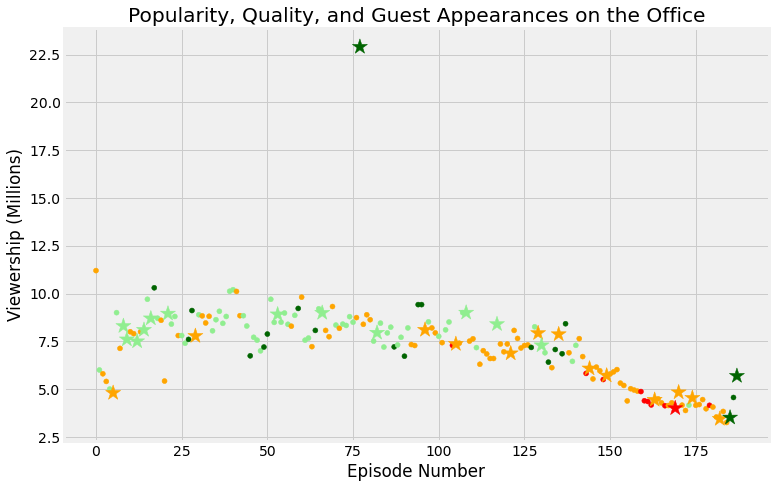

In [12]:
fig=plt.figure()
plt.style.use('fivethirtyeight')
plt.scatter(x=office_withNo_guests['episode_number'], y=office_withNo_guests['viewership_mil'], 
            c=office_withNo_guests['colors'], s=office_withNo_guests['sizes'])
plt.scatter(x=office_with_guests['episode_number'], y=office_with_guests['viewership_mil'], 
            c=office_with_guests['colors'], s=office_with_guests['sizes']
           ,marker='*')


plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

In [13]:
#max_view = office_data.sort_values(by='viewership_mil').max
max_view = office_data['viewership_mil'].max()
print(max_view)
#office_data[office_data['viewership_mil'] == max_view]['guest_stars']
top_star = office_data[office_data['viewership_mil'] == max_view]['guest_stars']
print(top_star)
print(office_data['viewership_mil'].idxmax())


22.91
77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object
77


In [14]:
top_star = "Cloris Leachman"

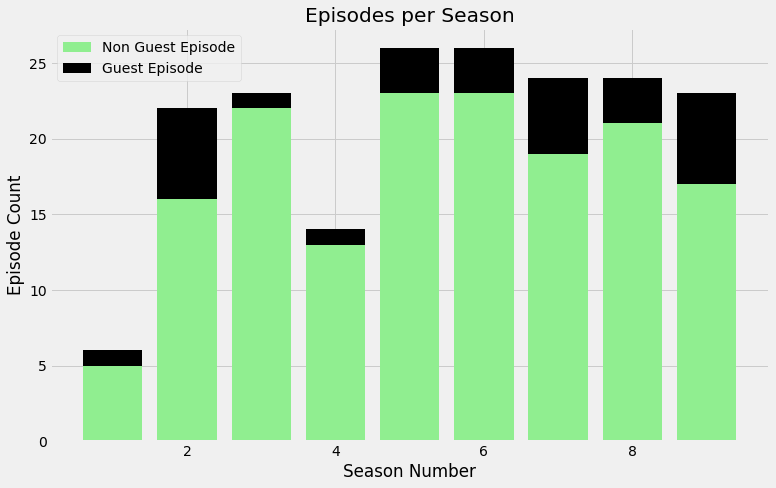

In [15]:
No_guests = office_withNo_guests['season'].value_counts(sort = False)
with_guests = office_with_guests['season'].value_counts(sort = False)

fig, ax = plt.subplots()
No_guests_b = ax.bar(No_guests.index, No_guests, color ='lightgreen', label = 'Non Guest Episode')
with_guests_b = ax.bar(with_guests.index, with_guests, color ='black', bottom = No_guests,label = 'Guest Episode')
ax.set_xlabel('Season Number')
ax.set_ylabel('Episode Count')
ax.set_title('Episodes per Season')


ax.legend() 
plt.show()

In [ ]:
%%nose
import pandas as pd
import numpy as np

color_data = np.genfromtxt('datasets/color_data.csv', delimiter=',')
bonus_color_data = np.genfromtxt('datasets/bonus_color_data.csv', delimiter=',')
bonus_color_data_2 = np.genfromtxt('datasets/bonus_color_data_2.csv', delimiter=',')
solution_data = pd.read_csv('datasets/solution_data.csv')

x_axis_data = solution_data['x_axis'].values
y_axis_data = solution_data['y_axis'].values
size_data = solution_data['sizes'].values


# Try to retrieve student plot data, if it's been specified, otherwise set test values to null
try:
    # Generate x and y axis containers
    stu_yaxis_cont = []
    stu_xaxis_cont = []
    stu_sizes_cont = []
    stu_colors_cont = []

    # Loop through every axis in student's figure and grab x and y data
    for col in fig.gca().collections:
        stu_yaxis_cont.append(col._offsets.data[:,1])
        stu_xaxis_cont.append(col._offsets.data[:,0])
        stu_sizes_cont.append(np.full((1, len(col._offsets.data[:,0])), col._sizes)[0])
        stu_colors_cont.append(col._facecolors)

    # Get figure labels
    title = fig.gca()._axes.get_title()
    x_label = fig.gca()._axes.get_xlabel()
    y_label = fig.gca()._axes.get_ylabel()

    # Concatenate lists to compare to test plot
    stu_yaxis = np.concatenate(stu_yaxis_cont)
    stu_xaxis = np.concatenate(stu_xaxis_cont)
    stu_sizes = np.concatenate(stu_sizes_cont)
    stu_colors = np.concatenate(stu_colors_cont)
except:
    title = 'null'
    x_label = 'null'
    y_label = 'null'
    stu_yaxis = 'null'
    stu_xaxis = 'null'
    stu_sizes = [0, 1]
    stu_colors = [0, 1]

# Tests
def test_fig_exists():
    import matplotlib
    # Extra function to test for existence of fig to allow custom feedback
    def test_fig():
        try:
            fig
            return True
        except:
            return False
    assert (test_fig() == True), \
    'Did you correctly initalize a `fig` object using `fig = plt.figure()`?'
    assert (type(fig) == matplotlib.figure.Figure), \
    'Did you correctly initalize a `fig` object using `fig = plt.figure()`?'

def test_y_axis():
    assert (sorted(stu_yaxis) == y_axis_data).all(), \
    'Are you correctly plotting viwership in millions on the y axis? Make sure you are calling your plot in the same cell that you initialize `fig`!'
    
def test_x_axis():
    assert (sorted(stu_xaxis) == x_axis_data).all(), \
    'Are you correctly plotting episode number on the x axis? Make sure you are calling your plot in the same cell that you initialize `fig`!'
    
def test_colors():
    assert (len(stu_colors) == len(color_data)), \
    'Are you correctly setting the colors according to the rating scheme provided? Make sure you are calling your plot in the same cell that you initialize `fig`!'
    assert (np.sort(color_data) == np.sort(stu_colors)).all() or \
    (np.sort(bonus_color_data) == np.sort(stu_colors)).all() or \
    (np.sort(bonus_color_data_2) == np.sort(stu_colors)).all(), \
    'Are you correctly setting the colors according to the rating scheme provided? Make sure you are calling your plot in the same cell that you initialize `fig`!'

def test_size():
    assert (len(stu_sizes) == len(size_data)), \
    'Are you correctly plotting all points as size 25, except for guest-star episodes which are sized at 250? Make sure you are calling your plot in the same cell that you initialize `fig`!'
    assert all(size_data == np.sort(stu_sizes)), \
    'Are you correctly plotting all points as size 25, except for guest-star episodes which are sized at 250? Make sure you are calling your plot in the same cell that you initialize `fig`!'

def test_labels():
    assert (title.lower() == ('Popularity, Quality, and Guest Appearances on the Office').lower()), \
    'Did you set the correct title? Make sure you are specifying your plot in the same cell that you initialize `fig`!'
    assert (x_label.lower() == ('Episode Number').lower()), \
    'Did you set the correct x label? Make sure you are specifying your plot in the same cell that you initialize `fig`!'
    assert (y_label.lower() == ('Viewership (Millions)').lower()), \
    'Did you set the correct x label? Make sure you are specifying your plot in the same cell that you initialize `fig`!' 

def test_stars():
    assert (top_star == 'Cloris Leachman' or top_star == 'Jack Black' or top_star == 'Jessica Alba'), \
    "Are you correctly assigning one of the guest stars of the most popular episode to `top_star`?"